<a href="https://colab.research.google.com/github/suryakiran594/DS/blob/main/CNN_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt  #plotting images
import matplotlib.image as mpimg #image related ops
import urllib.request # For URL Conversion
import numpy as np
import cv2 #opencv lib
import tensorflow as tf



In [3]:
car1=mpimg.imread('/content/2001_Lamborghini_Diablo_VT_SP22.jpg')

In [4]:
car1.shape

(388, 640, 3)

In [5]:
# Shape of particular row out of 388 rows

car1[125].shape

(640, 3)

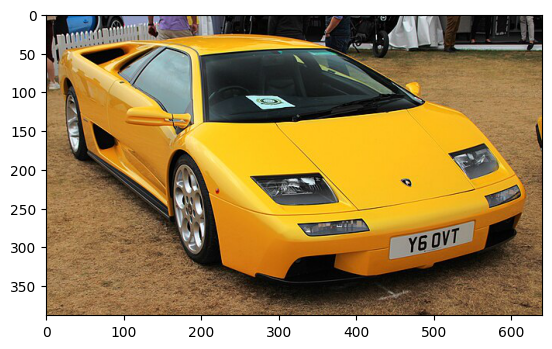

In [6]:
#plotting the image of our imported url
plt.imshow(car1)

In [7]:
#First [0] identifies 0 th row and again [0] referes 0 th column of oth row means top left corner of the image
car1[0][0]

array([144, 113,  93], dtype=uint8)

In [8]:
# Reading the image using cv2
#imread is used to read in colour mode and will have three color channel(R,G,B)
car1
car1_cv2=cv2.imread('/content/2001_Lamborghini_Diablo_VT_SP22.jpg')

In [9]:
car1_cv2

array([[[ 93, 112, 145],
        [101, 120, 153],
        [103, 123, 158],
        ...,
        [  1,   2,   0],
        [ 34,  37,  35],
        [ 38,  41,  39]],

       [[102, 121, 154],
        [103, 124, 156],
        [104, 124, 159],
        ...,
        [  3,   4,   2],
        [ 32,  35,  33],
        [ 33,  36,  34]],

       [[100, 121, 152],
        [ 98, 119, 150],
        [ 99, 120, 152],
        ...,
        [  5,   6,   4],
        [ 31,  34,  32],
        [ 38,  41,  39]],

       ...,

       [[ 94, 142, 170],
        [ 68, 116, 144],
        [ 35,  81, 112],
        ...,
        [ 46,  91, 128],
        [ 53,  99, 133],
        [ 59, 105, 139]],

       [[ 57, 107, 135],
        [ 76, 126, 154],
        [ 75, 122, 153],
        ...,
        [ 59, 104, 141],
        [ 63, 109, 143],
        [ 66, 114, 148]],

       [[ 90, 140, 168],
        [109, 159, 187],
        [ 81, 128, 159],
        ...,
        [ 81, 126, 163],
        [ 82, 130, 164],
        [ 88, 136, 170]]

In [10]:
from google.colab.patches import cv2_imshow         #is a function provided by colab to display image

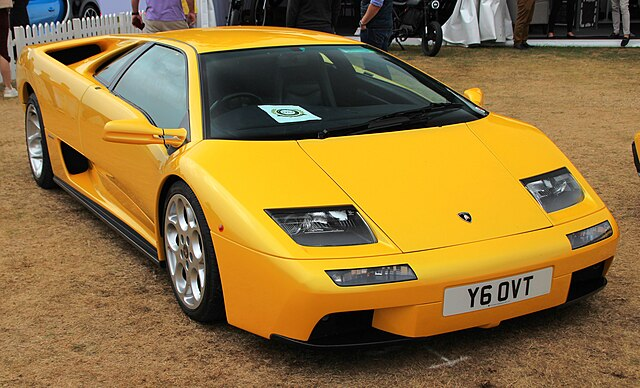

In [11]:
#importing cv2_imshow to display the numarray coverted image

cv2_imshow(car1_cv2)

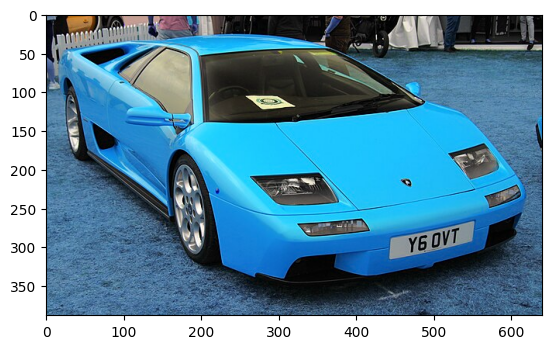

In [12]:
#cv2 reads images as BGR format and in matplotlib reads as RGB format
plt.imshow(car1_cv2)

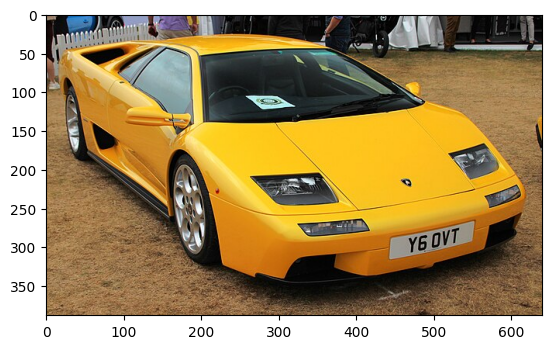

In [13]:
#converting car1_cv2 from BGR format as cv2 read in BRG format using cv2.cvtColor function of Open CV2
car1_cv2_BGR_RGB=cv2.cvtColor(car1_cv2,cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

In [14]:
# Array Value of old car1 image after conversion from BGR to RGB

car1_cv2_BGR_RGB

array([[[145, 112,  93],
        [153, 120, 101],
        [158, 123, 103],
        ...,
        [  0,   2,   1],
        [ 35,  37,  34],
        [ 39,  41,  38]],

       [[154, 121, 102],
        [156, 124, 103],
        [159, 124, 104],
        ...,
        [  2,   4,   3],
        [ 33,  35,  32],
        [ 34,  36,  33]],

       [[152, 121, 100],
        [150, 119,  98],
        [152, 120,  99],
        ...,
        [  4,   6,   5],
        [ 32,  34,  31],
        [ 39,  41,  38]],

       ...,

       [[170, 142,  94],
        [144, 116,  68],
        [112,  81,  35],
        ...,
        [128,  91,  46],
        [133,  99,  53],
        [139, 105,  59]],

       [[135, 107,  57],
        [154, 126,  76],
        [153, 122,  75],
        ...,
        [141, 104,  59],
        [143, 109,  63],
        [148, 114,  66]],

       [[168, 140,  90],
        [187, 159, 109],
        [159, 128,  81],
        ...,
        [163, 126,  81],
        [164, 130,  82],
        [170, 136,  88]]

In [15]:
car1_cv2_BGR_RGB.shape

(388, 640, 3)

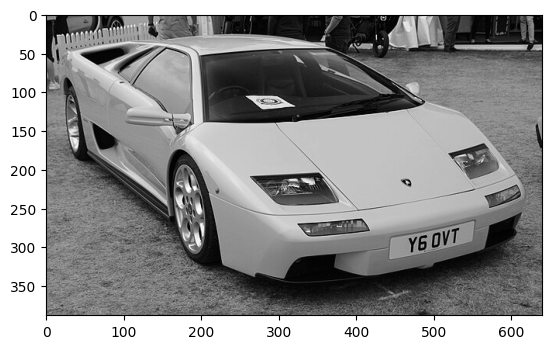

In [16]:
#converting car1_cv2_BGR format to Gray format using cv2.cvtColor function
car1_cv2_BGR_GRAY=cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap='gray')

In [17]:
# Gray format will have 1 dimension rather than 3 dimensions as like in RGB or BGR

car1_cv2_BGR_GRAY.shape

(388, 640)

In [18]:
car1_cv2_BGR_GRAY

array([[120, 128, 131, ...,   1,  36,  40],
       [129, 131, 132, ...,   3,  34,  35],
       [128, 126, 127, ...,   5,  33,  40],
       ...,
       [145, 119,  85, ...,  97, 104, 110],
       [110, 129, 126, ..., 110, 114, 119],
       [143, 162, 132, ..., 132, 135, 141]], dtype=uint8)

In [19]:
# max and min out of gray converted image

car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max()

(0, 255)

In [20]:
# cv2.split will split the provided image in their corresponding R,G,B channels
cv2.split(car1_cv2)

(array([[ 93, 101, 103, ...,   1,  34,  38],
        [102, 103, 104, ...,   3,  32,  33],
        [100,  98,  99, ...,   5,  31,  38],
        ...,
        [ 94,  68,  35, ...,  46,  53,  59],
        [ 57,  76,  75, ...,  59,  63,  66],
        [ 90, 109,  81, ...,  81,  82,  88]], dtype=uint8),
 array([[112, 120, 123, ...,   2,  37,  41],
        [121, 124, 124, ...,   4,  35,  36],
        [121, 119, 120, ...,   6,  34,  41],
        ...,
        [142, 116,  81, ...,  91,  99, 105],
        [107, 126, 122, ..., 104, 109, 114],
        [140, 159, 128, ..., 126, 130, 136]], dtype=uint8),
 array([[145, 153, 158, ...,   0,  35,  39],
        [154, 156, 159, ...,   2,  33,  34],
        [152, 150, 152, ...,   4,  32,  39],
        ...,
        [170, 144, 112, ..., 128, 133, 139],
        [135, 154, 153, ..., 141, 143, 148],
        [168, 187, 159, ..., 163, 164, 170]], dtype=uint8))

Understanding composition of colored images

In [21]:
def visualize_RGB_channel(imgArray=None,figsize=(10,8)):
  B,G,R=cv2.split(imgArray)
  Z=np.zeros(B.shape,dtype=B.dtype)
  fig, ax=plt.subplots(2,2,figsize=figsize)
  [axi.set_axis_off() for axi in ax.ravel()]
  ax[0,0].set_title('Original Image')
  ax[0,0].imshow(cv2.merge((R,G,B)))
  ax[0,1].set_title('Red Ch image')
  ax[0,1].imshow(cv2.merge((R,Z,Z)))
  ax[1,0].set_title('Green Ch Image')
  ax[1,0].imshow(cv2.merge((Z,G,Z)))
  ax[1,1].set_title('Blue Ch Image')
  ax[1,1].imshow(cv2.merge((Z,Z,B)))
  






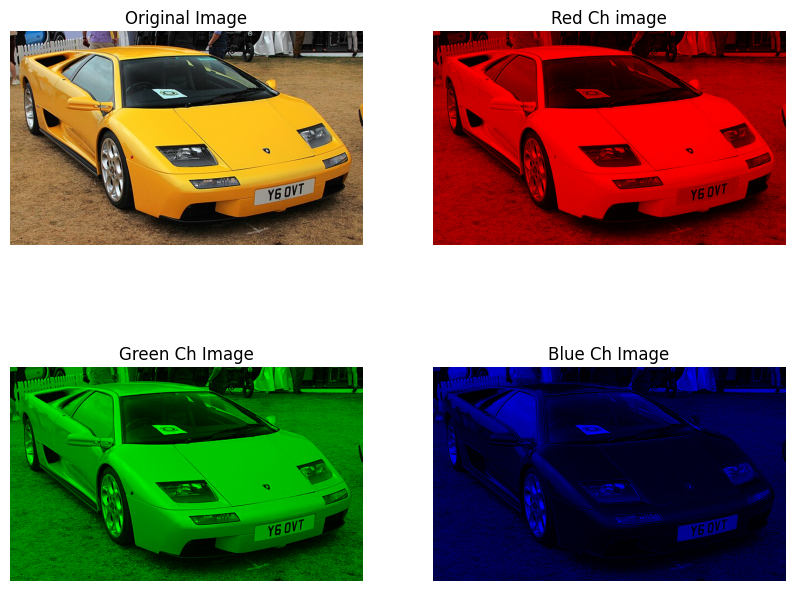

In [22]:
visualize_RGB_channel(imgArray=car1_cv2)

In [23]:
# creating 3 dimensional numpy array size 6*6*3 with random integer values within (0-255) range
random_colored_img=np.random.randint(0,255,(6,6,3))

In [24]:
# printing array value
random_colored_img

array([[[ 55, 169,  29],
        [ 88,   0, 174],
        [157, 155, 152],
        [ 50, 194, 211],
        [ 51,  75,  13],
        [108, 226,  11]],

       [[ 75,  39,  13],
        [ 25,  93, 189],
        [ 90, 252,  19],
        [100,  50,  34],
        [186, 101, 214],
        [ 29, 140, 160]],

       [[ 76,  66, 246],
        [162, 181, 233],
        [ 58, 170, 165],
        [227, 161, 146],
        [143, 207, 144],
        [ 78,  34, 168]],

       [[134,  78,  89],
        [178, 111, 215],
        [201, 229,  23],
        [ 55, 177, 191],
        [168,  46,  35],
        [ 98, 143, 254]],

       [[ 60,  79, 185],
        [124, 119, 249],
        [231,  54, 126],
        [115, 104,  10],
        [204, 244,  94],
        [ 40,  59,  73]],

       [[ 29,  27,  38],
        [212,  34, 115],
        [177, 195, 236],
        [174, 119,  63],
        [186, 223, 196],
        [142, 183, 116]]])

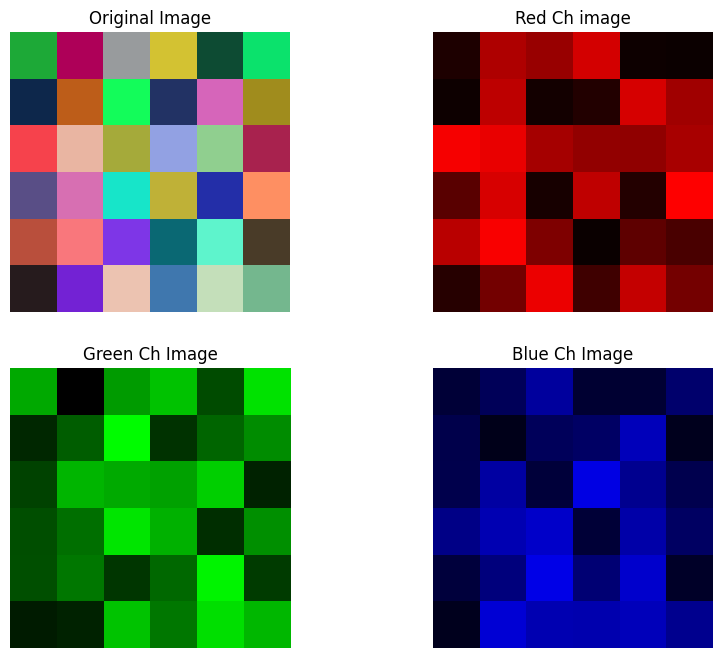

In [25]:
#passing the same to function to see R,G,B appearance
visualize_RGB_channel(imgArray=random_colored_img)

Understanding Filters

In [26]:
#sobel is a filter is used in image processing for edge detection
sobel=np.array([[1,0,-1],
                [2,0,-2],
                [1,0,-1]])

In [27]:
# In idle form it is vertical edges
print('highlighting vertical edges: \n',sobel)

highlighting vertical edges: 
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [28]:
# We need to transpose them to print in horizontal 
print('highlighting Horizontal edges: \n',sobel.T)

highlighting Horizontal edges: 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [29]:
# Consider below example to check custom image formation using 0 and 255
example1=[
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
]

#Converting it to array so we can plot image
example1=np.array(example1)

In [30]:
example1

array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

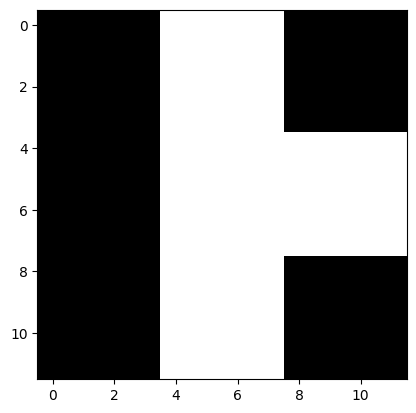

In [31]:
plt.imshow(example1,cmap='gray')

In [32]:
def simple_conv(imgFilter=None,picture=None):
  p_row,p_col=picture.shape
  k=imgFilter.shape[0]
  temp=list()
  stride=1
  final_cols=(p_col -k)//stride +1
  final_rows=(p_row -k)//stride +1
  for v_stride in range(final_rows):
    for h_stride in range(final_cols):
      target_area_of_pic=picture[v_stride:v_stride + k, h_stride:h_stride +k]
      z=sum(sum(imgFilter * target_area_of_pic))
      temp.append(z)
  resultant_image=np.array(temp).reshape(final_rows,final_cols)
  return resultant_image

In [33]:
k=3
v_stride=0
h_stride=0+1+1
target_area=example1[v_stride:v_stride+k,h_stride:h_stride+k]
target_area

array([[  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255]])

In [34]:
#Applying filter over image example1
result=simple_conv(imgFilter=sobel,picture=example1)


In [35]:
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

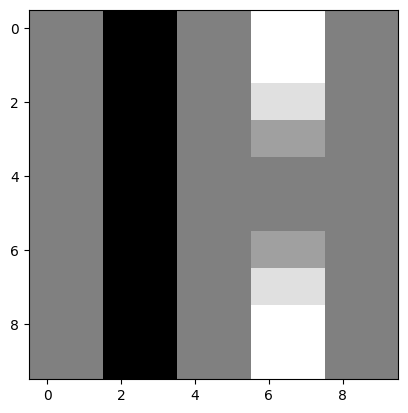

In [36]:
# plotting image of result which is produced applying filter over exampl1
plt.imshow(result,cmap='gray')

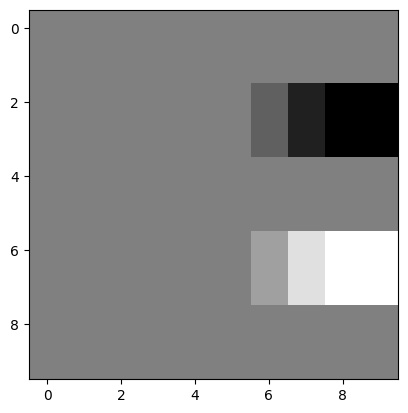

In [37]:
#applying transposed filter to example1 and further plotting it using imshow
result=simple_conv(imgFilter=sobel.T,picture=example1)
plt.imshow(result,cmap='gray')

In [38]:
# considering the different example and converting the same to array to further plot the image

example2=[
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0]
]

In [39]:
example2=np.array(example2)

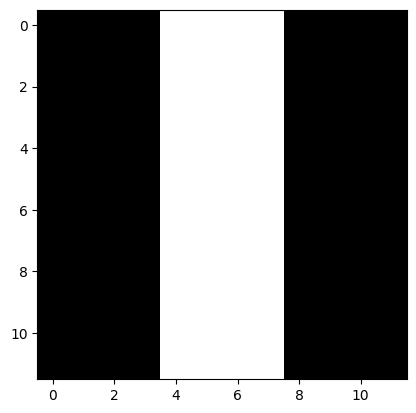

In [40]:
plt.imshow(example2,cmap='gray')

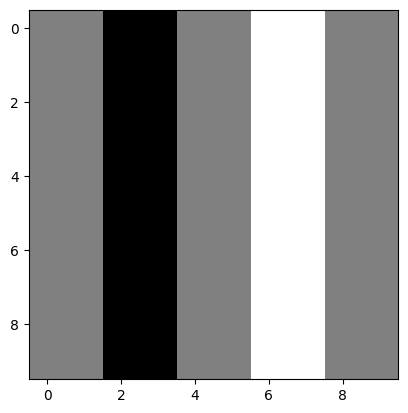

In [41]:
# plotting after applying sobel filter to example2
result=simple_conv(imgFilter=sobel,picture=example2)
plt.imshow(result,cmap='gray')

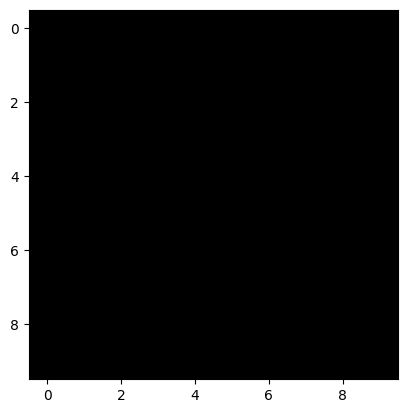

In [42]:
#plotting of image by applying transpose of filter to example2
result=simple_conv(imgFilter=sobel.T, picture=example2)
plt.imshow(result,cmap='gray')

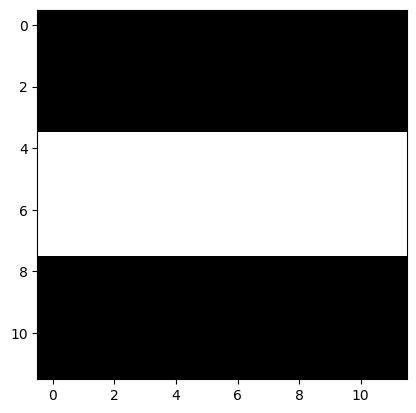

In [43]:
#plotting the transpose image without applying filte to it
example2_T=np.array(example2.T)
plt.imshow(example2_T,cmap='gray')

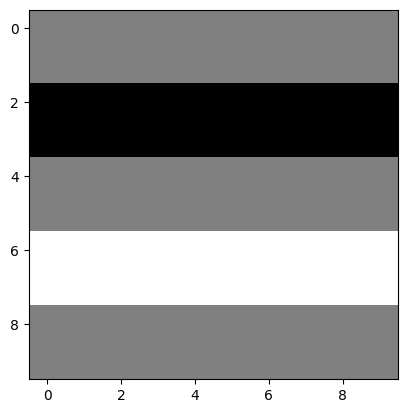

In [44]:
#plotting image agter applying transpose filter to transpose of example2

result=simple_conv(imgFilter=sobel.T,picture=example2_T)
plt.imshow(result,cmap='gray')

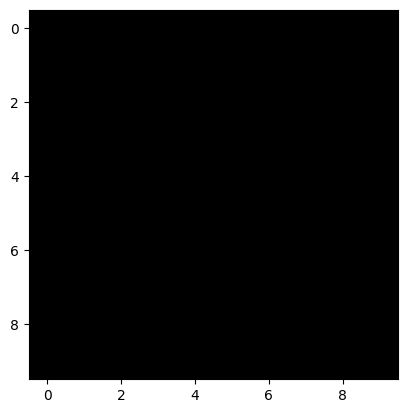

In [45]:
#applying simple filter to transpose of example2

result=simple_conv(imgFilter=sobel,picture=example2_T)
plt.imshow(result,cmap='gray')

Image of transposed filter to normal image example2 is same as normal filter applied to transposed image example2(full dark pixel 0)

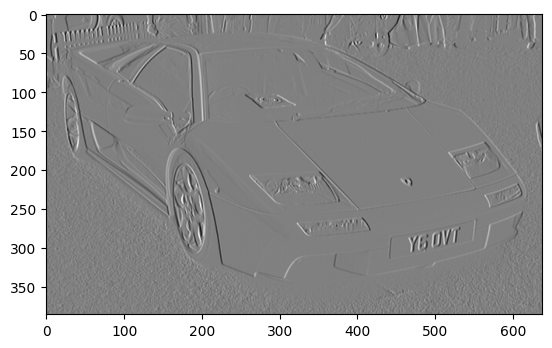

In [46]:
#plotting image after applying sobel filter to image of car converted from BGR to GRAY format

result=simple_conv(imgFilter=sobel,picture=car1_cv2_BGR_GRAY)
plt.imshow(result,cmap='gray')

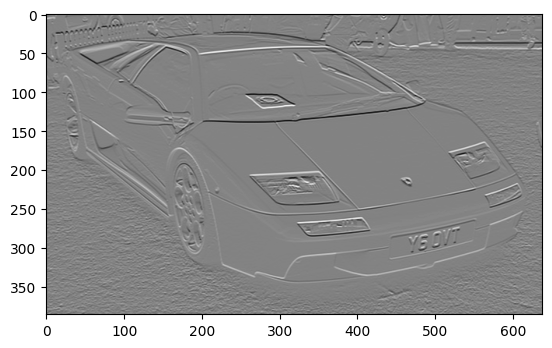

In [47]:
  #plotting image after applying transposed sobel filter to image of car converted from BGR to GRAY format

result=simple_conv(imgFilter=sobel.T,picture=car1_cv2_BGR_GRAY)
plt.imshow(result,cmap='gray')

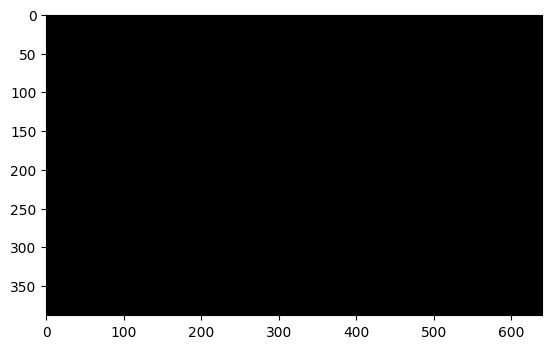

In [48]:
nothing=np.zeros(car1_cv2_BGR_GRAY.shape)
plt.imshow(nothing,cmap='gray')

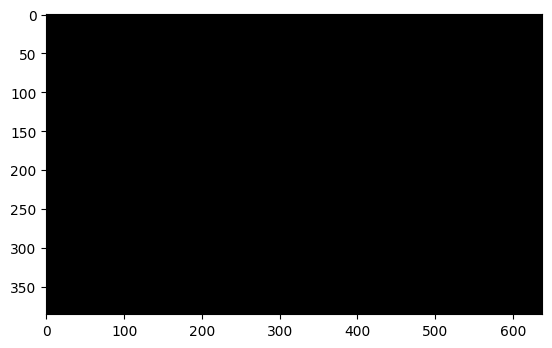

In [49]:
#plotting image with pixel 0 applying filter to it in transpose form as it will also be blank
result=simple_conv(imgFilter=sobel.T,picture=nothing)
plt.imshow(result,cmap='gray')

In [50]:
#create custom random filter of 3*3
random_f=np.random.randn(3,3)
random_f

array([[ 0.06433616,  0.60456895,  0.77852381],
       [-1.13437618,  0.26427838, -0.17177952],
       [-0.0284935 ,  0.76616502,  0.47469874]])

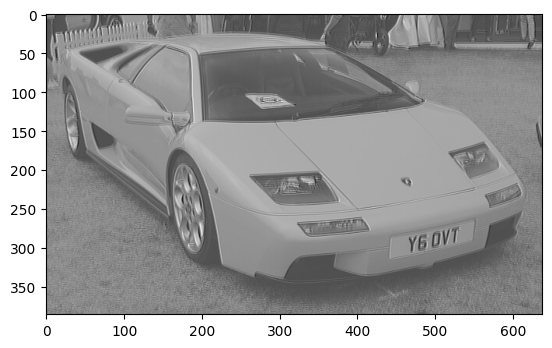

In [51]:
#plotting image after applying custom created filter with image car1_cv2

result=simple_conv(imgFilter=random_f,picture=car1_cv2_BGR_GRAY)
plt.imshow(result,cmap='gray')

In [60]:
def read_img(path,grayscale=True):
    img=cv2.imread(path)
    if grayscale:
     img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.imshow(img,cmap='gray')
    return img
    from google.colab.patches import cv2_imshow
    cv2_imshow(img)
    return img

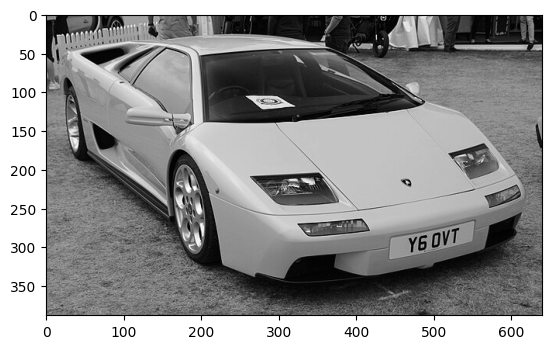

In [61]:
car=read_img('/content/2001_Lamborghini_Diablo_VT_SP22.jpg')

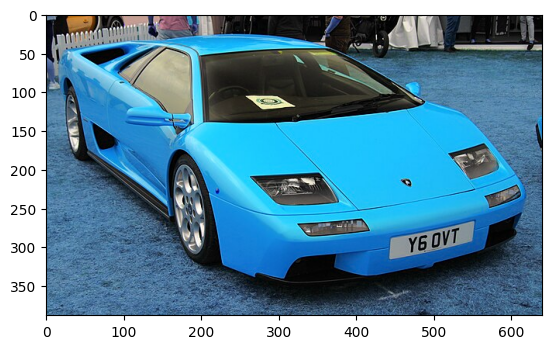

In [62]:
# plotting image with gray scale= False
color_car=read_img('/content/2001_Lamborghini_Diablo_VT_SP22.jpg',grayscale=False)

In [63]:

row,col=car.shape
car=car.reshape(1,row,col,1) # converting 3 channel image to 1 and reshaping it
car.shape

(1, 388, 640, 1)

In [64]:
#CONV_LAYER is list containing single Conv2D layer with 1 filter, filter size 3*3 with single stride in both direction.

CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,kernel_size=(3,3),
                                   strides=(1,1),
                                   input_shape=car.shape[1:])] 


In [65]:
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 386, 638, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [66]:
#passing car through each conv model and making prediction 
out=conv_model.predict(car)

1/1 [==============================] - 1s 608ms/step


In [67]:
out.shape

(1, 386, 638, 1)

In [68]:
row,col=out.shape[1:-1]

In [69]:
reshape_out=out.reshape(row,col)

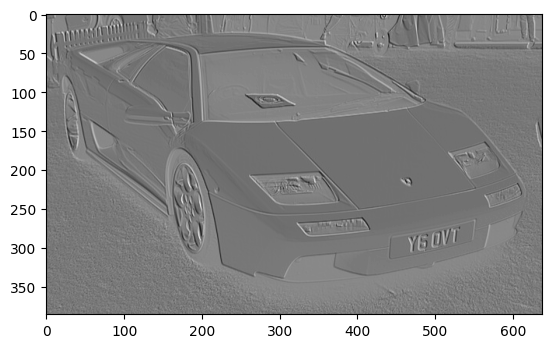

In [70]:
plt.imshow(reshape_out,cmap='gray')

In [71]:
#reshaping image of color car(original image)
row,col,depth=color_car.shape
color_car=color_car.reshape(1,row,col,depth)
color_car.shape

(1, 388, 640, 3)

In [72]:
# applying conv layer as same as earlier to 3 channel image 
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,kernel_size=(3,3),
                                   strides=(1,1),
                                   input_shape=color_car.shape[1:])] 
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 386, 638, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Making prediction by passing color_car through conv model
output=conv_model.predict(color_car)

1/1 [==============================] - 0s 73ms/step


In [74]:
output.shape

(1, 386, 638, 1)

In [75]:
# sperating row and column out of fit
row,col=output.shape[1:-1]
reshape_out=output.reshape(row,col)

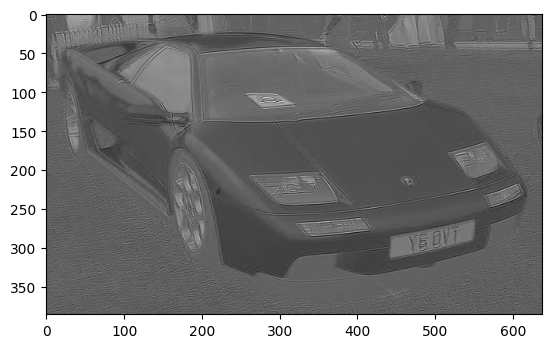

In [76]:
plt.imshow(reshape_out,cmap='gray')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 386, 638, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 82ms/step
(1, 386, 638, 1)


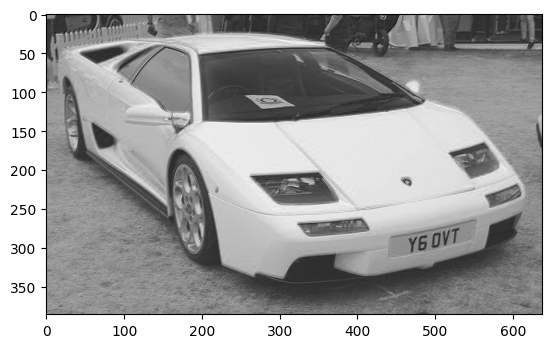

In [91]:
def reshaping_in(img,grayscale=True):   #passing image and grayscale parameters 
  if grayscale:   # if gray scale is true continue
    row,col=img.shape    #collecting row and col info
    img=img.reshape(1,row,col,1)   #reshaping the image
    return img    
  row,col,depth=img.shape     #when grayscale is false collect info of row, col and depth
  color_img=img.reshape(1,row,col,depth)    #colored img reshaping
  return color_img


def get_conv_model(filters=1,filter_size=(3,3),strides=(1,1),input_shape=None,padding='valid'):
  #creating list with single Conv2D layer and reset parameters of strides,filter_size,input size,no of filters and padding
  CONV_LAYER=[tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                     strides=(1,1),
                                     input_shape=input_shape,
                                     padding=padding)]

  conv_model=tf.keras.Sequential(CONV_LAYER) # Creating single sequential layered model with parameter CONV_LAYER
  conv_model.summary()
  return conv_model

def apply_conv_model_and_visualize(img,conv_model):  #passing img and model for visualization
    try:
      out=conv_model.predict(img)  #prediciton of output
      print(out.shape)  #printing shape of output
      row,col,depth=out.shape[1:] #collecting row,col and depth info
      reshape_out=out.reshape(row,col,depth) 

      for d in range(depth):
        plt.imshow(reshape_out[:,:,d],cmap='gray')   #plotting the img with reshaped dimension in range of depth
        plt.show
    except Exception as e:
      raise e

img=read_img('/content/2001_Lamborghini_Diablo_VT_SP22.jpg',grayscale=False)  #grayscale is false so we will plot 3 channel img
input_img=reshaping_in(img,grayscale=False)
model=get_conv_model(filters=1,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:]) #passing parameters to train model
apply_conv_model_and_visualize(input_img,model)





Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 386, 638, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 264ms/step
(1, 386, 638, 1)


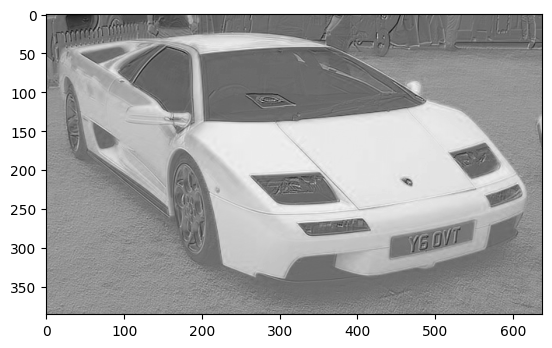

In [92]:
def reshaping_in(img,grayscale=True):   #passing image and grayscale parameters 
  if grayscale:   # if gray scale is true continue
    row,col=img.shape    #collecting row and col info
    img=img.reshape(1,row,col,1)   #reshaping the image
    return img    
  row,col,depth=img.shape     #when grayscale is false collect info of row, col and depth
  color_img=img.reshape(1,row,col,depth)    #colored img reshaping
  return color_img


def get_conv_model(filters=1,filter_size=(3,3),strides=(1,1),input_shape=None,padding='valid'):
  #creating list with single Conv2D layer and reset parameters of strides,filter_size,input size,no of filters and padding
  CONV_LAYER=[tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                     strides=(1,1),
                                     input_shape=input_shape,
                                     padding=padding)]

  conv_model=tf.keras.Sequential(CONV_LAYER) # Creating single sequential layered model with parameter CONV_LAYER
  conv_model.summary()
  return conv_model

def apply_conv_model_and_visualize(img,conv_model):  #passing img and model for visualization
    try:
      out=conv_model.predict(img)  #prediciton of output
      print(out.shape)  #printing shape of output
      row,col,depth=out.shape[1:] #collecting row,col and depth info
      reshape_out=out.reshape(row,col,depth) 

      for d in range(depth):
        plt.imshow(reshape_out[:,:,d],cmap='gray')   #plotting the img with reshaped dimension in range of depth
        plt.show
    except Exception as e:
      raise e

img=read_img('/content/2001_Lamborghini_Diablo_VT_SP22.jpg',grayscale=False)  #grayscale is false so we will plot 3 channel img
input_img=reshaping_in(img,grayscale=False)
model=get_conv_model(filters=1,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:]) #passing parameters to train model
apply_conv_model_and_visualize(input_img,model)





In [94]:
def max_pooling(img,pool_size=(2,2),strides=(2,2)):
  reshaped_img=reshaping_in(img)
  pooling_layer=tf.keras.layers.MaxPool2D(pool_size=pool_size,strides=strides)
  result=pooling_layer(reshaped_img)
  return result

(388, 640)
(1, 194, 320, 1)


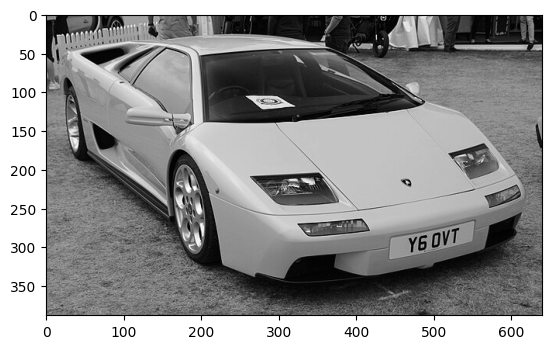

In [95]:
img=read_img('/content/2001_Lamborghini_Diablo_VT_SP22.jpg')
print(img.shape)
result=max_pooling(img)
print(result.shape)

In [96]:
def plot_pooling(result):
  _,row,col,_=result.shape
  reshape=tf.reshape(result,(row,col))
  plt.imshow(reshape,cmap='gray')
  

RecursionError: ignored

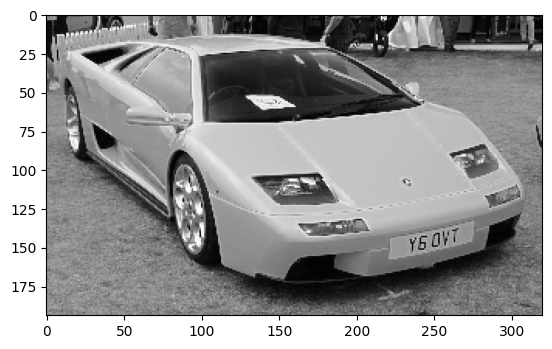

In [98]:
plot_pooling(result)

In [99]:
def plot_pooling(result):
  _,row,col,_=result.shape
  reshape=tf.reshape(result,(row,col))
  plt.imshow(reshape,cmap='gray')
  result=max_pooling(reshape.numpy())

In [100]:
print(result.shape)

(1, 194, 320, 1)


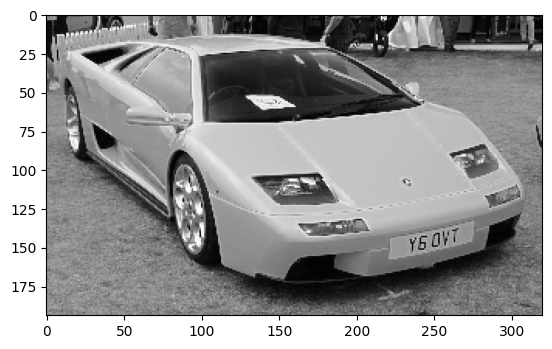

In [101]:
plot_pooling(result)

GlobalAvgPool2D

In [103]:
def global_avg_pooling(img,grayscale):
  reshaped_img=reshaping_in(img,grayscale)
  pooling_layer=tf.keras.layers

  result=pooling_layer(reshaped_img)
  return result

def plot_pooling(result):
  _,row,col,_=result.shape
  reshape=tf.reshape(result,(row,col))
  plt.imshow(reshape,cmap='gray')



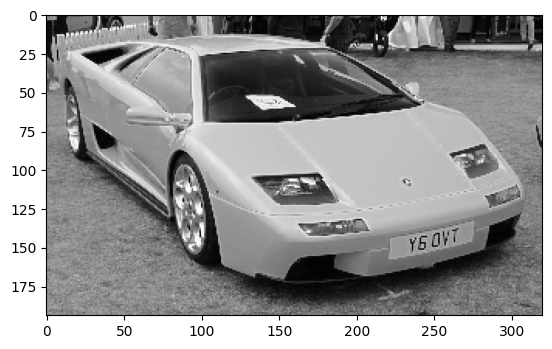

In [104]:
plot_pooling(result)

In [105]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                   kernel_size=(3,3),
                                   strides=(1,1),
                                   input_shape=color_car.shape[1:],
                                   activation='relu'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
            tf.keras.layers.GlobalAveragePooling2D(),
            tf.keras.layers.Dense(10,activation='relu'),
            tf.keras.layers.Dense(2,activation='softmax')]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 386, 638, 1)       28        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 193, 319, 1)      0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1)                0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 70
Trainable params: 70
Non-trainable pa

In [106]:
model.save('model.h5')